In [17]:
from pdf2image import convert_from_path
import numpy as np
import matplotlib.pyplot as plt
import imutils
import cv2

In [18]:
images = convert_from_path('samples/signpdf.pdf', 
            poppler_path='C:/Users/SRIRAM V/Downloads/poppler-22.01.0/Library/bin')

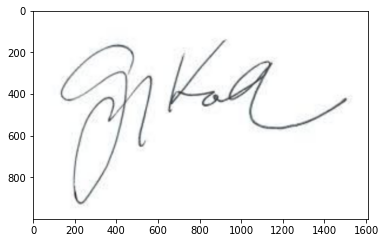

In [19]:
for img in images:
    img = np.array(img)
    #resize the image to height of 500 and keep the same aspect ratio
    ratio = img.shape[0]/500.0
    plt.imshow(imutils.resize(img,height=1000))

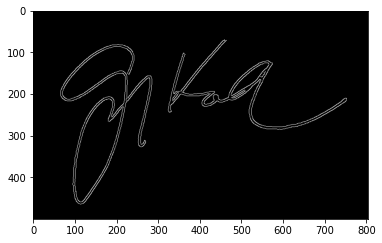

In [20]:
img = np.array(images[-1])
original = img.copy()
ratio = img.shape[0]/500.0
img = imutils.resize(img,height=500)
orig = img.copy()
#converting to grayscale image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(gray,'gray')
edged = cv2.Canny(gray,80,200)
plt.imshow(edged,'gray')

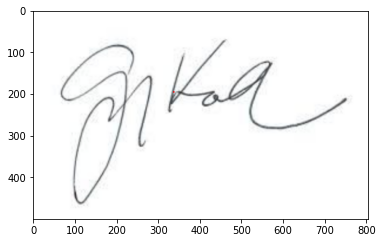

In [21]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key= cv2.contourArea, reverse=True)[:1]
for c in cnts:
    peri = cv2.arcLength(c,True)
    apprx = cv2.approxPolyDP(c, 0.2*peri, True)
    x,y,w,h = cv2.boundingRect(apprx)
    cv2.rectangle(orig,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(orig)